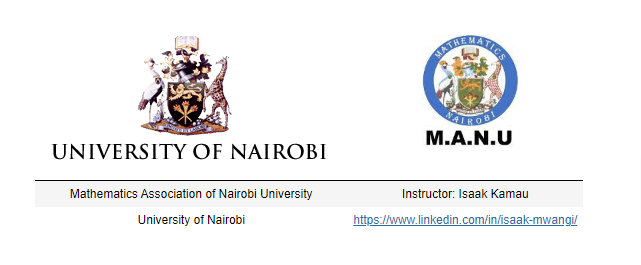

# Dealing with NaN

As mentioned earlier, before we can begin training our learning algorithms with large datasets, we usually need to clean the data first. This means we need to have a method for detecting and correcting errors in our data. While any given dataset can have many types of bad data, such as outliers or incorrect values, the type of bad data we encounter almost always is missing values. As we saw earlier, Pandas assigns `NaN` values to missing data. In this lesson we will learn how to detect and deal with `NaN` values.

We will begin by creating a DataFrame with some `NaN` values in it.

__Example 1. Create a DataFrame__

In [1]:
# We import Pandas as pd into Python
import pandas as pd

In [2]:
# We create a list of Python dictionaries
items2 = [{'bikes': 20, 'pants': 30, 'watches': 35, 'shirts': 15, 'shoes':8, 'suits':45},
{'watches': 10, 'glasses': 50, 'bikes': 15, 'pants':5, 'shirts': 2, 'shoes':5, 'suits':7},
{'bikes': 20, 'pants': 30, 'watches': 35, 'glasses': 4, 'shoes':10}]

# We create a DataFrame  and provide the row index
store_items = pd.DataFrame(items2, index = ['store 1', 'store 2', 'store 3'])

# We display the DataFrame
store_items

,bikes,pants,watches,shirts,shoes,suits,glasses
store 1,20,30,35,15.0,8,45.0,NaN
store 2,15,5,10,2.0,5,7.0,50.0
store 3,20,30,35,NaN,10,NaN,4.0


We can clearly see that the DataFrame we created has 3 NaN values: one in store 1 and two in store 3. However, in cases where we load very large datasets into a DataFrame, possibly with millions of items, the number of `NaN` values is not easily visualized. For these cases, we can use a combination of methods to count the number of `NaN` values in our data. The following example combines the `.isnull()` and the `sum()` methods to count the number of NaN values in our DataFrame.

__Example 2 a. Count the total NaN values__

In [4]:
# We count the number of NaN values in store_items
x =  store_items.isnull().sum().sum()

# We print x
print('Number of NaN values in our DataFrame:', x)

Number of NaN values in our DataFrame: 3


In [5]:
# Example 2 c. Count NaN down the column.
x =  store_items.isnull().sum()

x

bikes      0
pants      0
watches    0
shirts     1
shoes      0
suits      1
glasses    1
dtype: int64

In [6]:
# We count the number of NaN values in store_items
x =  store_items.isnull()

x

,bikes,pants,watches,shirts,shoes,suits,glasses
store 1,False,False,False,False,False,False,True
store 2,False,False,False,False,False,False,False
store 3,False,False,False,True,False,True,False


In the above example, the `.isnull()` method returns a Boolean DataFrame of the same size as store_items and indicates with `True` the elements that have `NaN` values and with `False` the elements that are not. Let's see an example:

__Example 2 b. Return boolean True/False for each element if it is a NaN__

In [7]:
store_items.isnull()

,bikes,pants,watches,shirts,shoes,suits,glasses
store 1,False,False,False,False,False,False,True
store 2,False,False,False,False,False,False,False
store 3,False,False,False,True,False,True,False


Instead of counting the number of `NaN` values we can also do the opposite, we can count the number of `non-NaN` values. We can do this by using the `.count()` method as shown below:

__Example 3. Count the total non-NaN values__

In [8]:
# We print the number of non-NaN values in our DataFrame
print()
print('Number of non-NaN values in the columns of our DataFrame:\n', store_items.count())


Number of non-NaN values in the columns of our DataFrame:
 bikes      3
pants      3
watches    3
shirts     2
shoes      3
suits      2
glasses    2
dtype: int64


## Eliminating NaN Values

Now that we learned how to know if our dataset has any `NaN` values in it, the next step is to decide what to do with them. In general, we have two options, we can either delete or replace the NaN values. In the following examples, we will show you how to do both.

We will start by learning how to eliminate rows or columns from our DataFrame that contain any NaN values. The `.dropna(axis)` method eliminates any rows with `NaN` values when `axis = 0` is used and will eliminate any columns with NaN values when `axis = 1` is used.

 <div class="alert alert-block alert-info">
<b>Tip:</b> Remember, you learned that you can read <b>axis = 0</b> as <b>down</b> and <b>axis = 1</b> as <b>across</b> the given Numpy ndarray or Pandas dataframe
</div>       
        
        
Let's see some examples.

__Example 4. Drop rows having NaN values__

In [10]:
# We drop any rows with NaN values
store_items.dropna(axis=0)

,bikes,pants,watches,shirts,shoes,suits,glasses
store 2,15,5,10,2.0,5,7.0,50.0


__Example 5. Drop columns having NaN values__

In [11]:
# We drop any columns with NaN values
store_items.dropna(axis=1)

,bikes,pants,watches,shoes
store 1,20,30,35,8
store 2,15,5,10,5
store 3,20,30,35,10


## Substituting NaN Values

Now, instead of eliminating `NaN` values, we can replace them with suitable values. We could choose for example to replace all `NaN` values with the value 0. We can do this by using the `.fillna()` method as shown below.

__Example 6. Replace NaN with 0__

In [13]:
# We replace all NaN values with 0
store_items.fillna(0)

,bikes,pants,watches,shirts,shoes,suits,glasses
store 1,20,30,35,15.0,8,45.0,0.0
store 2,15,5,10,2.0,5,7.0,50.0
store 3,20,30,35,0.0,10,0.0,4.0


__Example 7. Forward fill NaN values down (axis = 0) the dataframe__

In [14]:
# We replace NaN values with the previous value in the column
store_items.fillna(method = 'ffill', axis = 0)

,bikes,pants,watches,shirts,shoes,suits,glasses
store 1,20,30,35,15.0,8,45.0,NaN
store 2,15,5,10,2.0,5,7.0,50.0
store 3,20,30,35,2.0,10,7.0,4.0


Notice that the two `NaN` values in store 3 have been replaced with previous values in their columns. However, notice that the `NaN` value in store 1 didn't get replaced. That's because there are no previous values in this column, since the `NaN` value is the first value in that column. However, if we do forward fill using the previous row values, this won't happen. Let's take a look:

__Example 8. Forward fill NaN values across (axis = 1) the dataframe__

<div class="alert alert-block alert-danger">
<b>Notice! </b>Notice that the <b>.fillna()</b> method replaces (fills) the <b>NaN</b> values out of place. This means that the original DataFrame is not modified. You can always replace the <b>NaN</b> values in place by setting the keyword <b>inplace = True</b> inside the <b>fillna()</b> function.
</div>

In [16]:
store_items

,bikes,pants,watches,shirts,shoes,suits,glasses
store 1,20,30,35,15.0,8,45.0,NaN
store 2,15,5,10,2.0,5,7.0,50.0
store 3,20,30,35,NaN,10,NaN,4.0


In [17]:
# We replace NaN values with the next value in the column
store_items.fillna(0, inplace = True)

In [18]:
store_items

,bikes,pants,watches,shirts,shoes,suits,glasses
store 1,20,30,35,15.0,8,45.0,0.0
store 2,15,5,10,2.0,5,7.0,50.0
store 3,20,30,35,0.0,10,0.0,4.0


In Data analysis you will most likely use databases from many sources. Pandas allows us to load databases of different formats into DataFrames. One of the most popular data formats used to store databases is csv. CSV stands for Comma Separated Values and offers a simple format to store data. We can load CSV files into Pandas DataFrames using the `pd.read_csv()` function. Let's load Google stock data into a Pandas DataFrame. The `GOOG.csv` file contains Google stock data from `8/19/2004 till 10/13/2017` taken from Yahoo Finance.

## Example 1. Load the data from a `.csv` file

In [3]:
# We load Google stock data in a DataFrame
Google_stock = pd.read_csv('./GOOG.csv')

# We print some information about Google_stock
print('Google_stock is of type:', type(Google_stock))
print('Google_stock has shape:', Google_stock.shape)

Google_stock is of type: <class 'pandas.core.frame.DataFrame'>
Google_stock has shape: (3313, 7)


In [4]:
Google_stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.676899,51.693783,47.669952,49.845802,49.845802,44994500
1,2004-08-20,50.178635,54.187561,49.925285,53.805050,53.805050,23005800
2,2004-08-23,55.017166,56.373344,54.172661,54.346527,54.346527,18393200
3,2004-08-24,55.260582,55.439419,51.450363,52.096165,52.096165,15361800
4,2004-08-25,52.140873,53.651051,51.604362,52.657513,52.657513,9257400
...,...,...,...,...,...,...,...
3308,2017-10-09,980.000000,985.424988,976.109985,977.000000,977.000000,891400
3309,2017-10-10,980.000000,981.570007,966.080017,972.599976,972.599976,968400
3310,2017-10-11,973.719971,990.710022,972.250000,989.250000,989.250000,1693300
3311,2017-10-12,987.450012,994.119995,985.000000,987.830017,987.830017,1262400


In [5]:
#Example 3. Look at the first 5 rows of the DataFrame

Google_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.676899,51.693783,47.669952,49.845802,49.845802,44994500
1,2004-08-20,50.178635,54.187561,49.925285,53.805050,53.805050,23005800
2,2004-08-23,55.017166,56.373344,54.172661,54.346527,54.346527,18393200
3,2004-08-24,55.260582,55.439419,51.450363,52.096165,52.096165,15361800
4,2004-08-25,52.140873,53.651051,51.604362,52.657513,52.657513,9257400


In [6]:
#Example 4. Look at the last 5 rows of the DataFrame

Google_stock.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3308,2017-10-09,980.000000,985.424988,976.109985,977.000000,977.000000,891400
3309,2017-10-10,980.000000,981.570007,966.080017,972.599976,972.599976,968400
3310,2017-10-11,973.719971,990.710022,972.250000,989.250000,989.250000,1693300
3311,2017-10-12,987.450012,994.119995,985.000000,987.830017,987.830017,1262400
3312,2017-10-13,992.000000,997.210022,989.000000,989.679993,989.679993,1157700


We can also optionally use `.head(N)` or `.tail(N)` to display the first and last `N` rows of data, respectively.

Let's do a quick check to see whether we have any `NaN` values in our dataset. To do this, we will use the `.isnull()` method
followed by the `.any()` method to check whether any of the columns contain NaN values.

__Example 5. Check if any column contains a NaN. Returns a boolean for each column label.__

In [23]:
Google_stock.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

We see that we have no `NaN` values.

When dealing with large datasets, it is often useful to get statistical information from them. Pandas provides the `.describe()` method to get descriptive statistics on each column of the DataFrame. Let's see how this works:

__Example 6. See the descriptive statistics of the DataFrame__

In [7]:
# We get descriptive statistics on our stock data
Google_stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3.313000e+03
mean,380.186092,383.493740,376.519309,380.072458,380.072458,8.038476e+06
std,223.818650,224.974534,222.473232,223.853780,223.853780,8.399521e+06
min,49.274517,50.541279,47.669952,49.681866,49.681866,7.900000e+03
25%,226.556473,228.394516,224.003082,226.407440,226.407440,2.584900e+06
50%,293.312286,295.433502,289.929291,293.029114,293.029114,5.281300e+06
75%,536.650024,540.000000,532.409973,536.690002,536.690002,1.065370e+07
max,992.000000,997.210022,989.000000,989.679993,989.679993,8.276810e+07


__Example 7. See the descriptive statistics of one of the columns of the DataFrame__

In [8]:
# We get descriptive statistics on a single column of our DataFrame
Google_stock['Adj Close'].describe()

count    3313.000000
mean      380.072458
std       223.853780
min        49.681866
25%       226.407440
50%       293.029114
75%       536.690002
max       989.679993
Name: Adj Close, dtype: float64

Similarly, you can also look at one statistic by using one of the many statistical functions Pandas provides. Let's look at some examples:

__Example 8. Statistical operations - Min, Max, and Mean__

In [9]:
# We print information about our DataFrame  
print()
print('Maximum values of each column:\n', Google_stock.max())
print()
print('Minimum Close value:', Google_stock['Close'].min())
print()
print('Average value of each column:\n', Google_stock.mean())


Maximum values of each column:
 Date         2017-10-13
Open              992.0
High         997.210022
Low               989.0
Close        989.679993
Adj Close    989.679993
Volume         82768100
dtype: object

Minimum Close value: 49.681866

Average value of each column:
 Open         3.801861e+02
High         3.834937e+02
Low          3.765193e+02
Close        3.800725e+02
Adj Close    3.800725e+02
Volume       8.038476e+06
dtype: float64


C:\Users\Isaac\AppData\Local\Temp\ipykernel_9092\2578638969.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('Average value of each column:\n', Google_stock.mean())


Another important statistical measure is data correlation. Data correlation can tell us, for example, if the data in different columns are correlated. We can use the `.corr()` method to get the correlation between different columns, as shown below:

__Example 9. Statistical operation - Correlation__

In [10]:
Google_stock.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999904,0.999845,0.999745,0.999745,-0.564258
High,0.999904,1.000000,0.999834,0.999868,0.999868,-0.562749
Low,0.999845,0.999834,1.000000,0.999899,0.999899,-0.567007
Close,0.999745,0.999868,0.999899,1.000000,1.000000,-0.564967
Adj Close,0.999745,0.999868,0.999899,1.000000,1.000000,-0.564967
Volume,-0.564258,-0.562749,-0.567007,-0.564967,-0.564967,1.000000


A correlation value of 1 tells us there is a high correlation and a correlation of 0 tells us that the data is not correlated at all.

## `groupby()` method

We will end this Introduction to Pandas by taking a look at the `.groupby()` method. The `.groupby()` method allows us to group data in different ways. Let's see how we can group data to get different types of information. For the next examples, we are going to load fake data about a fictitious company.

In [11]:
data = pd.read_csv('fake-company.csv')
data

,Year,Name,Department,Age,Salary
0,1990,Alice,HR,25,50000
1,1990,Bob,RD,30,48000
2,1990,Charlie,Admin,45,55000
3,1991,Dakota,HR,26,52000
4,1991,Elsa,RD,31,50000
5,1991,Frank,Admin,46,60000
6,1992,Grace,Admin,27,60000
7,1992,Hoffman,RD,32,52000
8,1992,Inaar,Admin,28,62000


__Example 10. Demonstrate groupby() and sum() method__

Let's calculate how much money the company spent on salaries each year. To do this, we will group the data by Year using the `.groupby()` method and then we will add up the salaries of all the employees by using the `.sum()` method.

In [12]:
# We display the total amount of money spent in salaries each year
data.groupby('Year')['Salary'].sum()

Year
1990    153000
1991    162000
1992    174000
Name: Salary, dtype: int64

### Example 11. Demonstrate `groupby()` and `mean()` method

Now, let's suppose I want to know what was the average salary for each year. In this case, we will group the data by Year using the `.groupby()` method, just as we did before, and then we use the `.mean()` method to get the average salary. Let's see how this works

In [13]:
# We display the average salary per year
data.groupby('Year')['Salary'].mean()

Year
1990    51000.0
1991    54000.0
1992    58000.0
Name: Salary, dtype: float64

In [14]:
# We display the total salary each employee received in all the years they worked for the company
data.groupby('Name')['Salary'].sum()

Name
Alice      50000
Bob        48000
Charlie    55000
Dakota     52000
Elsa       50000
Frank      60000
Grace      60000
Hoffman    52000
Inaar      62000
Name: Salary, dtype: int64

### Example 13. Demonstrate `groupby()` on two columns

Now let's see what was the salary distribution per department per year. In this case, we will group the data by Year and by Department using the `.groupby()` method and then we will add up the salaries for each department. Let's see the result

In [15]:
# We display the salary distribution per department per year.
data.groupby(['Year', 'Department'])['Salary'].sum()

Year  Department
1990  Admin          55000
      HR             50000
      RD             48000
1991  Admin          60000
      HR             52000
      RD             50000
1992  Admin         122000
      RD             52000
Name: Salary, dtype: int64

# Data Visualization

You've learned to use `NumPy` and `Pandas` to read and manipulate your data from a statistical and mathematical standpoint. Now, you'll visualize your data in the form of graphs/charts, to get insights that the statistics alone may not completely convey.

The current and the next lesson will help you learn to draw a variety of informative statistical visualizations using the `Matplotlib` and `Seaborn` packages.

The current lesson will focus on introducing univariate visualizations: bar charts, and histograms. By the end of this lesson, you will be able to:

   1. Create bar charts for qualitative variables, for example, the amount (number) of eggs consumed in a meal (categories: {breakfast, lunch, or dinner}). In general, bar chart maps categories to numbers.

   2. Create Pie charts. A pie chart is a common univariate plot type that is used to depict relative frequencies for levels of a categorical variable. A pie chart is preferably used when the number of categories is less, and you'd like to see the proportion of each category.

   3. Create histograms for quantitative variables. A histogram splits the (tabular) data into evenly sized intervals and displays the count of rows in each interval with bars. A histogram is similar to a bar chart, except that the "category" here is a range of values.

   4. Analyze the bar charts and histograms.

Once you have the foundational knowledge of Matplotlib and Seaborn, we will move on to the next lesson (`part-2`), where you'll learn advanced visualizations such as heat map, scatter plot, violin plots, box plots, clustered bar charts, and many others.


## What is Tidy Data?

In this course, it is expected that your data is organized in some kind of tidy format. In short, a tidy dataset is a tabular dataset where:

   1. each variable is a column
   2. each observation is a row
   3. each type of observational unit is a table



A __bar chart__ depicts the distribution of a categorical variable. In a bar chart, each level of the categorical variable is depicted with a bar, whose height indicates the frequency of data points that take on that level.

## Bar Chart using Seaborn

A basic bar chart of frequencies can be created through the use of seaborn's countplot function.
```
    seaborn.countplot(*, x=None, y=None, data=None, order=None, orient=None, color=None)
```
We will see the usage of a few of the arguments of the `countplot()` function.

#### Example 1. Create a vertical bar chart using Seaborn, with default colors

In [16]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [17]:
# Read the csv file, and check its top 10 rows
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


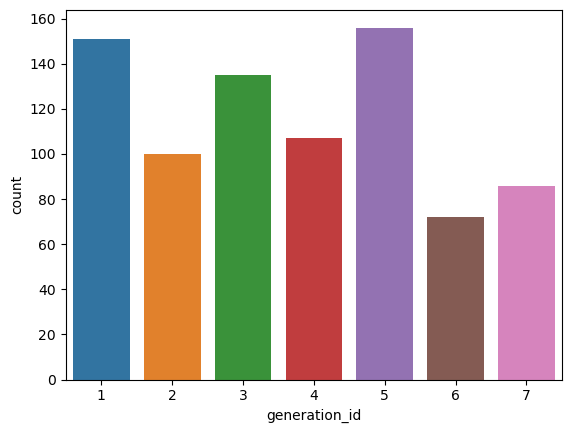

In [18]:
# A semicolon (;) at the end of the statement will supress printing the plotting information
sb.countplot(data=pokemon, x='generation_id');

In the example above, all the bars have a different color. This might come in handy for building associations between these category labels and encodings in plots with more variables. Otherwise, it's a good idea to simplify the plot and reduce unnecessary distractions by plotting all bars in the same color. You can choose to have a uniform color across all bars, by using the `color` argument, as shown in the example below:

#### Example 2. Create a vertical bar chart using Seaborn, with a uniform single color

<Axes: xlabel='generation_id', ylabel='count'>

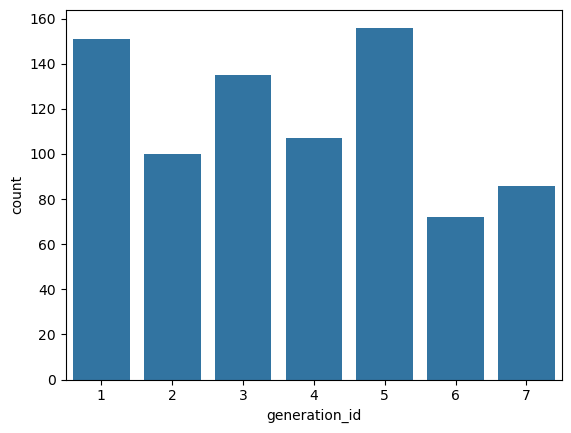

In [19]:
# The `color_palette()` returns the the current / default palette as a list of RGB tuples. 
# Each tuple consists of three digits specifying the red, green, and blue channel values to specify a color. 
# Choose the first tuple of RGB colors
base_color = sb.color_palette()[0]

# Use the `color` argument
sb.countplot(data=pokemon, x='generation_id', color=base_color)

## Bar Chart using the Matplotlib

You can even create a similar bar chart using the Matplotlib, instead of Seaborn. We will use the `matplotlib.pyplot.bar()` function to plot the chart. The syntax is:
```
    matplotlib.pyplot.bar(x, y, width=0.8, bottom=None, *, align='center', data=None)
```
Refer to the documentation for the details of optional arguments. In the example below, we will use `Series.value_counts()` to extract a Series from the given DataFrame object.

#### Example 3. Create a vertical bar chart using Matplotlib, with a uniform single color

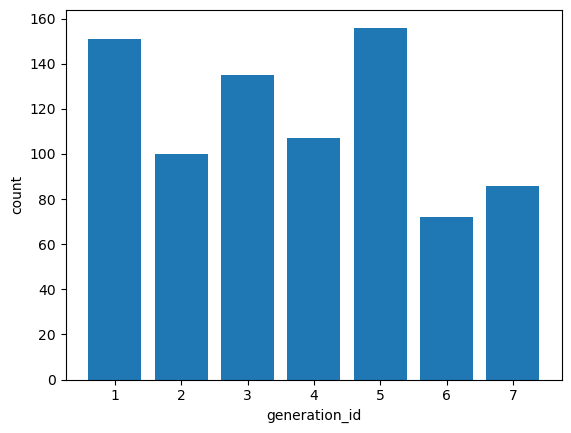

In [20]:
# Return the Series having unique values
x = pokemon['generation_id'].unique()

# Return the Series having frequency count of each unique value
y = pokemon['generation_id'].value_counts(sort=False)

plt.bar(x, y)

# Labeling the axes
plt.xlabel('generation_id')
plt.ylabel('count')

# Dsiplay the plot
plt.show()